# --- Gráficos de Autocorrelación (ACF) y Autocorrelación Parcial (PACF) 📊 ---

Vamos a crear un codigo que nos permita generar los gráficos de Autocorrelación (ACF) y Autocorrelación Parcial (PACF) de las series de **Temp_Maxima_C** y **Temp_Minima_C** con la finalidad de comprobar aun más si nuestras series son o no estacionarias

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

df = pd.read_csv('dataset/pinar_del_rio_temperaturas_LIMPIO_FINAL.csv')

# Aseguramos que la columna 'Fecha' sea el índice de tipo DatetimeIndex
df['Fecha'] = pd.to_datetime(df['Fecha'])
df = df.set_index('Fecha')

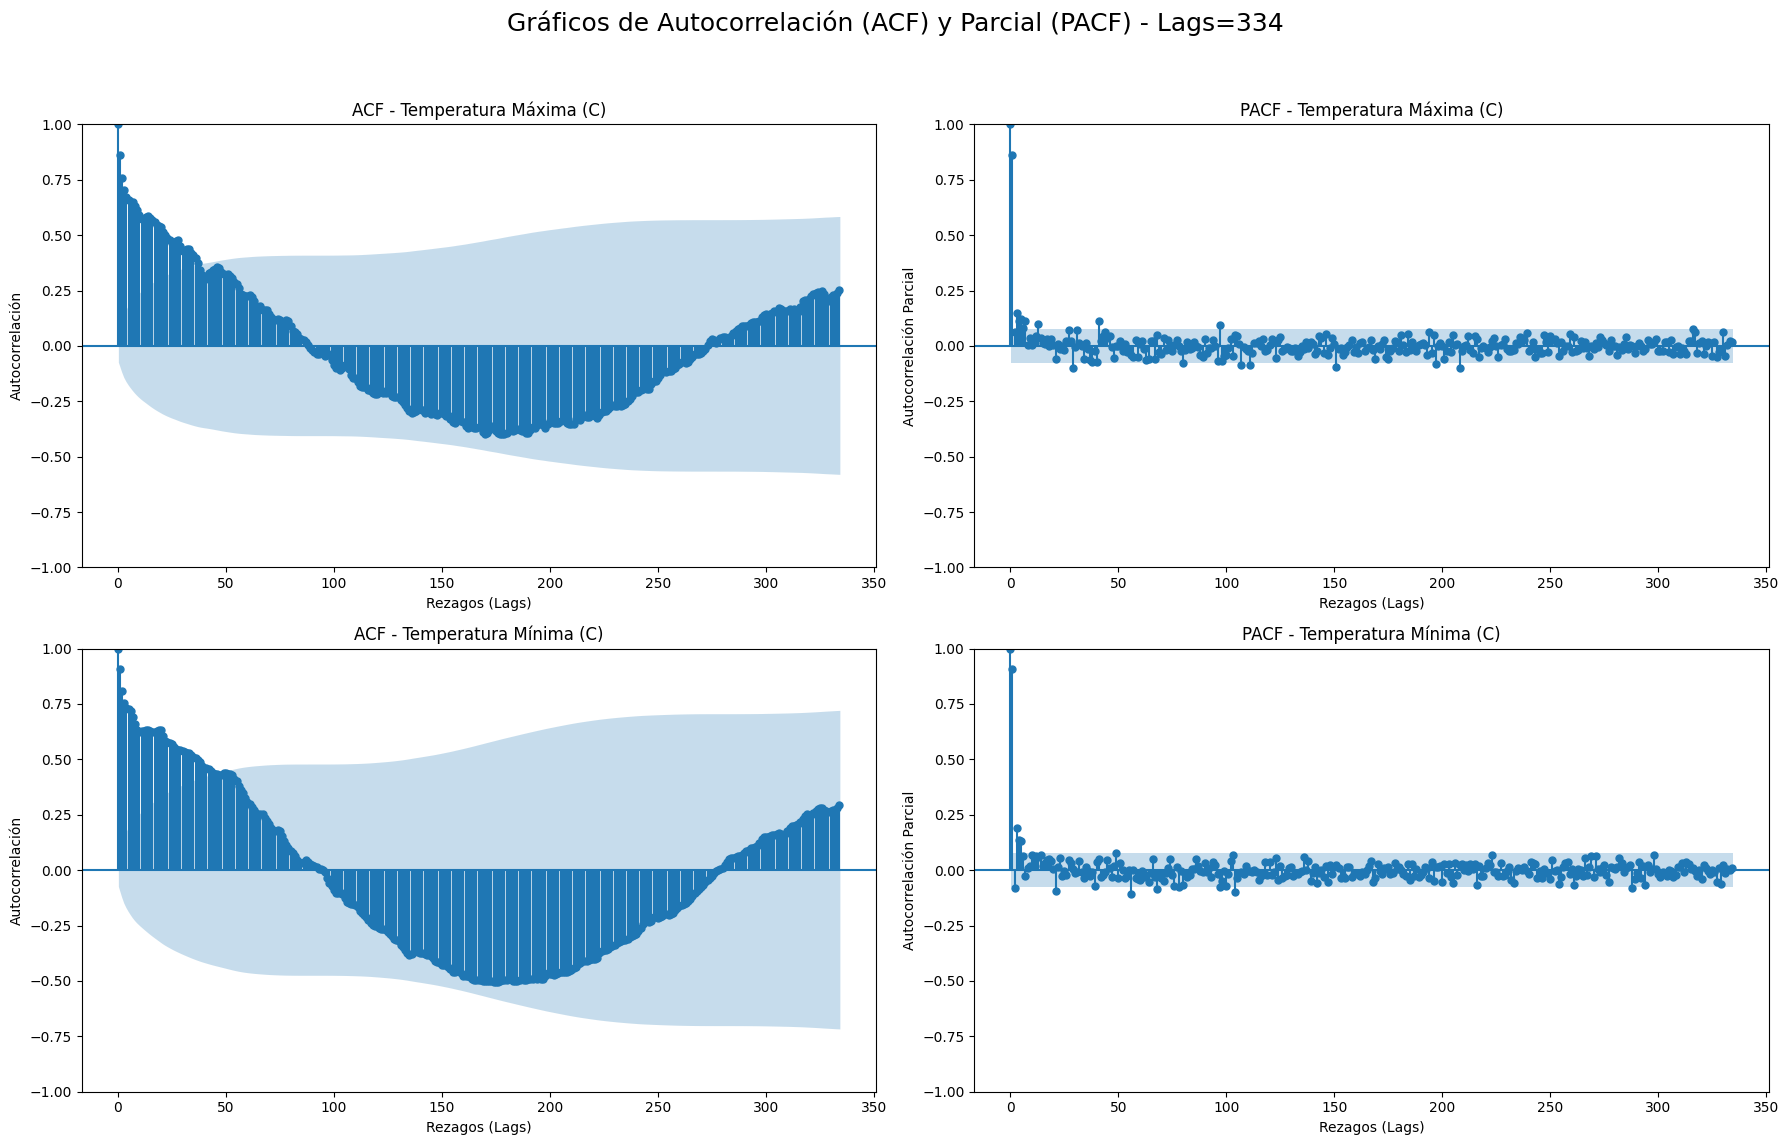

In [4]:
# --- PASO 2: Generar gráficos ACF y PACF (con lags = 365) ---

# Ajustamos el número de rezagos (lags) a 365 para capturar la estacionalidad anual.
lags = 334

# Creamos una figura grande para mostrar todas las gráficas juntas
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 12))
plt.suptitle(f'Gráficos de Autocorrelación (ACF) y Parcial (PACF) - Lags={lags}', fontsize=18)

# --- Fila 1: Temp_Maxima_C ---
# 1. ACF para Temp_Maxima_C
plot_acf(df['Temp_Maxima_C'], lags=lags, ax=axes[0, 0], title='ACF - Temperatura Máxima (C)')
axes[0, 0].set_xlabel('Rezagos (Lags)')
axes[0, 0].set_ylabel('Autocorrelación')

# 2. PACF para Temp_Maxima_C
# Se usa 'ywm' como método para PACF, que es común en statsmodels
plot_pacf(df['Temp_Maxima_C'], lags=lags, ax=axes[0, 1], title='PACF - Temperatura Máxima (C)', method='ywm')
axes[0, 1].set_xlabel('Rezagos (Lags)')
axes[0, 1].set_ylabel('Autocorrelación Parcial')

# --- Fila 2: Temp_Minima_C ---
# 3. ACF para Temp_Minima_C
plot_acf(df['Temp_Minima_C'], lags=lags, ax=axes[1, 0], title='ACF - Temperatura Mínima (C)')
axes[1, 0].set_xlabel('Rezagos (Lags)')
axes[1, 0].set_ylabel('Autocorrelación')

# 4. PACF para Temp_Minima_C
plot_pacf(df['Temp_Minima_C'], lags=lags, ax=axes[1, 1], title='PACF - Temperatura Mínima (C)', method='ywm')
axes[1, 1].set_xlabel('Rezagos (Lags)')
axes[1, 1].set_ylabel('Autocorrelación Parcial')

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Ajustar para el título principal
plt.show()

## 📝 Conclusiones Detalladas del Análisis ACF y PACF (Lags = 334)

Los gráficos de Autocorrelación (ACF) y Autocorrelación Parcial (PACF) de las series de `Temp_Maxima_C` y `Temp_Minima_C` revelan una estructura compleja que requiere un modelo de series temporales.

### 1. No Estacionariedad (Componente Determinista de la Tendencia)

* **Evidencia en ACF:** En ambas series, la función de Autocorrelación (ACF) muestra un **decaimiento extremadamente lento, lineal y persistente** a lo largo de los 334 rezagos. La autocorrelación se mantiene significativamente por encima de la banda de confianza azul durante casi todo el período.
* **Implicación:** Esta es la señal visual más fuerte de que las series **NO SON ESTACIONARIAS en la media** debido a la presencia de una tendencia. Los valores pasados influyen directamente en los futuros sin que el efecto se disipe rápidamente.
* **Acción Requerida:** Antes de proceder con el modelado, es obligatorio aplicar una **diferenciación de orden 1** ($d=1$) para transformar la serie en estacionaria.

### 2. Fuerte Estacionalidad Anual (Componente Estacional SARIMA)

* **Evidencia en ACF y PACF:** Ambas gráficas muestran un **pico significativamente alto y prominente** en el rezago **$k \approx 365$** (visible en el final de las gráficas, cerca del límite de 334).
* **Implicación:** Esto confirma una **fuerte dependencia estacional anual** ($s=365$). El clima de un día se correlaciona fuertemente con el clima del mismo día del año anterior.
* **Acción Requerida:** La estacionalidad deberá ser modelada usando un componente **SARIMA** (Seasonal ARIMA) con un periodo estacional de $s=365$.

### 3. Orden del Modelo (Propuestas Iniciales)

Los picos más allá del decaimiento lento (la estacionalidad) deben ser interpretados una vez que la serie haya sido diferenciada. Sin embargo, podemos anticipar la naturaleza del modelo:

* **Componente AR y MA (p, q):** En la PACF, después del rezago 1 (que probablemente sea parte de la tendencia), no hay un patrón claro de corte inmediato. Esto se aclarará después de la diferenciación.
* **Componente Estacional (P, Q):**
    * El **pico único y brusco** en **PACF** en el rezago estacional ($k=365$) sugiere un posible componente **Autorregresivo Estacional de orden 1** ($P=1$) o un **Corte Brusco** en el rezago estacional de la PACF.
    * El patrón en la ACF en el rezago $k=365$ también será crucial después de la diferenciación estacional.

